In [1]:
from appgeopy import *
from my_packages import *

#### Add back the slope-based correction into original InSAR

In [3]:
delta_slope_fpath = r"DeltaSlope_within_CRFP_Oct2025.shp"
delta_slope_df = gpd.read_file(delta_slope_fpath, read_geometry=False)
delta_slope_df = delta_slope_df.set_index("PointKey")
show(delta_slope_df)

Loading ITables v2.4.5 from the internet... (need help?)


In [4]:
# load timeseries of cumulative displacement of all points
cumdisp_df = pd.read_pickle(r"Monthly_CUMDISP_in_CRFP_saveqgis_Oct2025.xz")
cumdisp_df = cumdisp_df.loc[delta_slope_df.index, :]
# cumdisp_df = cumdisp_df.set_index("PointKey")
show(cumdisp_df)

Loading ITables v2.4.5 from the internet... (need help?)


In [5]:
cumdisp_df.dtypes

X_TWD97      float64
Y_TWD97      float64
D20160430    float64
D20160531    float64
D20160630    float64
              ...   
D20250331    float64
D20250430    float64
D20250531    float64
D20250630    float64
D20250731    float64
Length: 114, dtype: object

#### check index alignment

In [6]:
delta_slope_df.index.equals(cumdisp_df.index)

True

#### calculate the table of values for correction

In [7]:
measure_cols = [col for col in cumdisp_df.columns if col.startswith("D")]
cumdisp_measure_df = cumdisp_df.loc[:, measure_cols]
cumdisp_measure_df

,D20160430,D20160531,D20160630,D20160731,D20160831,D20160930,D20161031,D20161130,D20161231,D20170131,...,D20241031,D20241130,D20241231,D20250131,D20250228,D20250331,D20250430,D20250531,D20250630,D20250731
PointKey,,,,,,,,,,,,,,,,,,,,,
X197632863Y2676863692,-0.12,-6.84,-12.32,-17.69,-22.72,-26.59,-29.04,-30.33,-31.68,-33.83,...,-119.59,-117.16,-115.22,-114.69,-115.31,-116.38,-117.08,-117.62,-118.91,-121.99
X197750368Y2676780450,-5.10,-12.16,-17.29,-21.22,-24.35,-26.89,-28.99,-30.48,-31.80,-33.45,...,-143.84,-143.27,-142.71,-142.64,-143.32,-144.80,-146.46,-147.91,-149.04,-150.48
X197507350Y2676667484,-1.24,-8.01,-12.53,-15.94,-18.84,-21.33,-23.25,-24.30,-25.02,-26.18,...,-86.97,-85.19,-83.41,-82.58,-83.11,-85.01,-87.48,-90.11,-92.88,-96.71
X198184414Y2676568246,-9.58,-11.27,-12.13,-12.32,-12.01,-11.40,-10.65,-10.06,-9.94,-10.59,...,-123.03,-121.55,-120.36,-119.95,-120.44,-121.92,-124.07,-126.78,-129.80,-133.39
X198143193Y2676529527,-9.29,-10.15,-10.98,-11.83,-12.38,-12.51,-12.48,-12.84,-14.06,-16.02,...,-107.74,-108.04,-108.74,-109.83,-110.94,-111.99,-112.88,-113.99,-115.57,-117.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X170939849Y2600791234,-2.37,-10.73,-17.65,-23.03,-25.74,-25.65,-23.91,-22.49,-22.71,-24.63,...,-82.98,-79.96,-78.84,-79.52,-80.76,-81.84,-82.43,-83.02,-83.78,-84.12
X170980362Y2600789960,-3.51,-10.72,-16.72,-21.21,-23.02,-22.22,-20.06,-18.50,-18.62,-20.20,...,-64.96,-62.30,-61.60,-62.48,-63.62,-64.42,-64.73,-65.11,-65.64,-65.54
X170859386Y2600753434,-4.34,-10.79,-17.18,-22.98,-26.31,-26.68,-25.44,-24.83,-26.17,-28.92,...,-57.41,-54.98,-55.03,-56.87,-58.67,-59.61,-59.70,-59.98,-60.83,-61.19


#### we also need a table of values for correction with same shape, `907462 rows × 112 columns`

`N` rows of $\Delta_{slope}$ x `M` columns of numeric datetime

```
arr1 = np.arange(1, 6)
arr2 = np.arange(11, 5, -1)
arr1, arr2
>> (array([1, 2, 3, 4, 5]), array([11, 10,  9,  8,  7,  6]))
```

```
np.multiply(arr1.reshape(-1, 1), arr2)
>> array([[11, 10,  9,  8,  7,  6],
       [22, 20, 18, 16, 14, 12],
       [33, 30, 27, 24, 21, 18],
       [44, 40, 36, 32, 28, 24],
       [55, 50, 45, 40, 35, 30]])
```

```
np.outer(arr1, arr2)
>> array([[11, 10,  9,  8,  7,  6],
       [22, 20, 18, 16, 14, 12],
       [33, 30, 27, 24, 21, 18],
       [44, 40, 36, 32, 28, 24],
       [55, 50, 45, 40, 35, 30]])
```

In [8]:
measure_cols_numeric = [
    pd.to_datetime(col[1:]) + relativedelta(days=1) for col in measure_cols
]
measure_cols_numeric = np.array(
    [(ele - measure_cols_numeric[0]).days for ele in measure_cols_numeric]
)

measure_cols_numeric[:5]

array([  0,  31,  61,  92, 123])

In [9]:
slope_array = delta_slope_df["Predicted"].values
correction_value_arr = np.outer(slope_array, measure_cols_numeric)
correction_value_df = pd.DataFrame(
    data=correction_value_arr,
    index=cumdisp_measure_df.index,
    columns=cumdisp_measure_df.columns,
)
show(correction_value_df)

Loading ITables v2.4.5 from the internet... (need help?)


In [10]:
show(cumdisp_measure_df)

Loading ITables v2.4.5 from the internet... (need help?)


In [11]:
corrected_cumdisp_df = cumdisp_measure_df.add(correction_value_df)
show(corrected_cumdisp_df)

Loading ITables v2.4.5 from the internet... (need help?)


In [22]:
corrected_cumdisp_df.shape[0]==cumdisp_df.shape[0]

True

In [14]:
corrected_cumdisp_df.dtypes

D20160430    float64
D20160531    float64
D20160630    float64
D20160731    float64
D20160831    float64
              ...   
D20250331    float64
D20250430    float64
D20250531    float64
D20250630    float64
D20250731    float64
Length: 112, dtype: object

In [17]:
info_df = cumdisp_df.loc[:, ~cumdisp_df.columns.isin(measure_cols)]
final_output_pdf = pd.concat([info_df, corrected_cumdisp_df], axis=1)

In [23]:
# Calculate memory usage in bytes
mem_bytes = cumdisp_df.memory_usage(deep=True).sum()
# Convert to megabytes
mem_megabytes = mem_bytes / (1024**2)

print(f"Memory usage: {mem_megabytes:.3f} MB")

Memory usage: 856.769 MB


In [24]:
final_output_pdf.to_pickle(
    r"CORRECTED_Monthly_CUMDISP_CRFP_saveqgis_Oct2025.xz"
)

<AxesSubplot:>

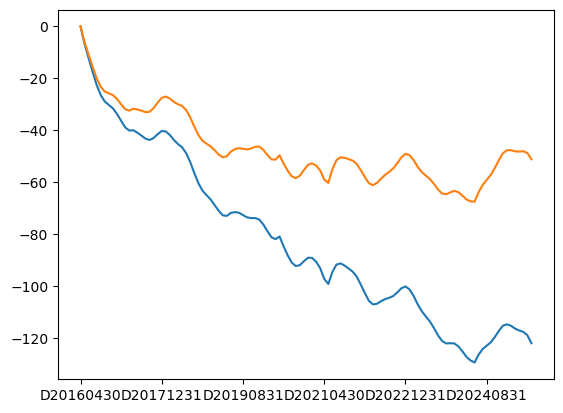

In [13]:
cumdisp_measure_df.iloc[0, :].plot()
corrected_cumdisp_df.iloc[0, :].plot()